<a href="https://colab.research.google.com/github/FarzanaAdiba/Multivariate-Time-Series-Prediction-Deep-Learning/blob/main/lstm_final_HCO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the tools
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read csv file
df=pd.read_csv("/content/drive/MyDrive/filtered_multi124_clean.csv",
               parse_dates = [0],
               low_memory= False,
               index_col = [0])
df.head()

,HR,PO2,PCO2,HCO3,PH
time,,,,,
2020-11-01 11:30:00,139,NaN,NaN,NaN,NaN
2020-11-01 12:30:00,147,66.0,43.0,19.0,7.25
2020-11-01 13:30:00,148,40.0,62.0,26.0,7.23
2020-11-01 14:30:00,147,66.0,30.0,16.0,7.33
2020-11-01 15:30:00,133,59.0,40.0,22.0,7.35


<Figure size 1440x432 with 0 Axes>

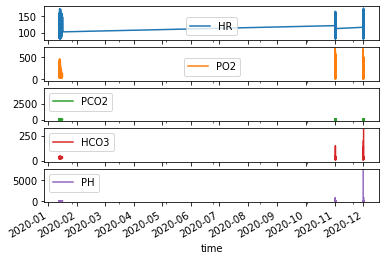

In [ ]:
plt.figure(figsize=(20,6))
df.plot(subplots=True)
plt.show()

In [ ]:
df.isnull().head()

,HR,PO2,PCO2,HCO3,PH
time,,,,,
2020-11-01 11:30:00,False,True,True,True,True
2020-11-01 12:30:00,False,False,False,False,False
2020-11-01 13:30:00,False,False,False,False,False
2020-11-01 14:30:00,False,False,False,False,False
2020-11-01 15:30:00,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8958 entries, 2020-11-01 11:30:00 to 2020-01-13 10:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HR      8958 non-null   int64  
 1   PO2     2746 non-null   float64
 2   PCO2    2731 non-null   float64
 3   HCO3    2645 non-null   float64
 4   PH      2749 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 419.9 KB


In [ ]:
#fill the empty columns
df=df.fillna(value={"HR":df.HR.mean(),"PO2":df.PO2.mean(),"PCO2":df.PCO2.mean(),"HCO3":df.HCO3.mean(),"PH":df.PH.mean()})
df

,HR,PO2,PCO2,HCO3,PH
time,,,,,
2020-11-01 11:30:00,139,210.521672,43.678048,26.630926,10.621966
2020-11-01 12:30:00,147,66.000000,43.000000,19.000000,7.250000
2020-11-01 13:30:00,148,40.000000,62.000000,26.000000,7.230000
2020-11-01 14:30:00,147,66.000000,30.000000,16.000000,7.330000
2020-11-01 15:30:00,133,59.000000,40.000000,22.000000,7.350000
...,...,...,...,...,...
2020-01-13 06:30:00,111,210.521672,43.678048,26.630926,10.621966
2020-01-13 07:30:00,109,210.521672,43.678048,26.630926,10.621966
2020-01-13 08:30:00,107,210.521672,43.678048,26.630926,10.621966


<Figure size 1440x432 with 0 Axes>

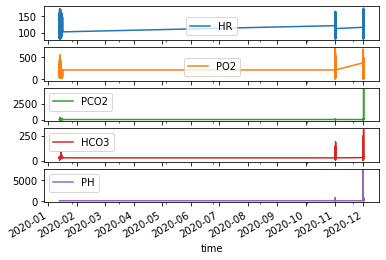

In [ ]:
plt.figure(figsize=(20,6))
df.plot(subplots=True)
plt.show()

In [ ]:
df['pred_HCO3']=df.HCO3.shift(-1)
df1=df.dropna()
df1

,HR,PO2,PCO2,HCO3,PH,pred_HCO3
time,,,,,,
2020-11-01 11:30:00,139,210.521672,43.678048,26.630926,10.621966,19.000000
2020-11-01 12:30:00,147,66.000000,43.000000,19.000000,7.250000,26.000000
2020-11-01 13:30:00,148,40.000000,62.000000,26.000000,7.230000,16.000000
2020-11-01 14:30:00,147,66.000000,30.000000,16.000000,7.330000,22.000000
2020-11-01 15:30:00,133,59.000000,40.000000,22.000000,7.350000,26.630926
...,...,...,...,...,...,...
2020-01-13 05:30:00,120,71.900000,24.200000,16.600000,7.440000,26.630926
2020-01-13 06:30:00,111,210.521672,43.678048,26.630926,10.621966,26.630926
2020-01-13 07:30:00,109,210.521672,43.678048,26.630926,10.621966,26.630926


In [ ]:
values=df1.values
#ensuring all data are float
values=values.astype('float64')
values

array([[139.        , 210.52167152,  43.67804833,  26.63092628,
         10.62196581,  19.        ],
       [147.        ,  66.        ,  43.        ,  19.        ,
          7.25      ,  26.        ],
       [148.        ,  40.        ,  62.        ,  26.        ,
          7.23      ,  16.        ],
       ...,
       [109.        , 210.52167152,  43.67804833,  26.63092628,
         10.62196581,  26.63092628],
       [107.        , 210.52167152,  43.67804833,  26.63092628,
         10.62196581,  26.63092628],
       [107.        , 210.52167152,  43.67804833,  26.63092628,
         10.62196581,  17.        ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(values)
scaled=pd.DataFrame(scaled)
scaled.head()

,0,1,2,3,4,5
0,0.617021,0.302611,0.008607,0.078817,0.001244,0.054098
1,0.702128,0.091969,0.008464,0.054098,0.000785,0.076774
2,0.712766,0.054074,0.012479,0.076774,0.000782,0.044380
3,0.702128,0.091969,0.005716,0.044380,0.000796,0.063816
4,0.553191,0.081767,0.007830,0.063816,0.000798,0.078817


In [ ]:
def ts(df1,look_back=1,pred_col=1):
    t=df1.copy()
    t["id"]=range(1,len(t)+1)
    t=t.iloc[:-look_back,:]
    t.set_index('id',inplace=True)
    pred_value=df1.copy()
    pred_value=pred_value.iloc[look_back:,pred_col]
    pred_value.columns=["pred_HCO3"]
    pred_value=pd.DataFrame(pred_value)
    
    pred_value["id"]=range(1,len(pred_value)+1)
    pred_value.set_index('id',inplace=True)
    final_df=pd.concat([t,pred_value],axis=1)
    
    return final_df

In [ ]:
arr_df=ts(scaled,1,0)
arr_df.fillna(0,inplace=True)
arr_df.columns=['v1(t-60)','v2(t-60)','v3(t-60)','v4(t-60)','v5(t-60)','v6(t-60)','v1(t)']
print(arr_df)

      v1(t-60)  v2(t-60)  v3(t-60)  v4(t-60)  v5(t-60)  v6(t-60)     v1(t)
id                                                                        
1     0.617021  0.302611  0.008607  0.078817  0.001244  0.054098  0.702128
2     0.702128  0.091969  0.008464  0.054098  0.000785  0.076774  0.712766
3     0.712766  0.054074  0.012479  0.076774  0.000782  0.044380  0.702128
4     0.702128  0.091969  0.005716  0.044380  0.000796  0.063816  0.553191
5     0.553191  0.081767  0.007830  0.063816  0.000798  0.078817  0.521277
...        ...       ...       ...       ...       ...       ...       ...
8952  0.372340  0.302611  0.008607  0.078817  0.001244  0.046323  0.414894
8953  0.414894  0.100568  0.004491  0.046323  0.000811  0.078817  0.319149
8954  0.319149  0.302611  0.008607  0.078817  0.001244  0.078817  0.297872
8955  0.297872  0.302611  0.008607  0.078817  0.001244  0.078817  0.276596
8956  0.276596  0.302611  0.008607  0.078817  0.001244  0.078817  0.276596

[8956 rows x 7 columns]


In [ ]:
#split into train and test set
values=arr_df.values
train_split=int(len(df1)*0.90)
train=values[:train_split,:]
test=values[train_split:,:]
#split into input and outputs
xtrain,ytrain=train[:,:-1],train[:,-1]
xtest,ytest=test[:,:-1],test[:,-1]

print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(8061, 6) (8061,) (895, 6) (895,)


In [ ]:
#reshaping input to [samples,time_step,features]
xtrain=xtrain.reshape((xtrain.shape[0],1,xtrain.shape[1]))
xtest=xtest.reshape((xtest.shape[0],1,xtest.shape[1]))
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(8061, 1, 6) (8061,) (895, 1, 6) (895,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers import Dropout
#create LSTM model
model=keras.models.Sequential([
    keras.layers.LSTM(120,return_sequences=True,input_shape=(xtrain.shape[1],xtrain.shape[2])),
    keras.layers.LSTM(75,return_sequences=True),
    keras.layers.LSTM(25),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1,activation='relu')
])
#callbacks =[ EarlyStopping ( monitor ='loss',patience =0 , verbose=1, mode ='auto')]

model.compile(loss='mae',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 120)            60960     
                                                                 
 lstm_1 (LSTM)               (None, 1, 75)             58800     
                                                                 
 lstm_2 (LSTM)               (None, 25)                10100     
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 129,886
Trainable params: 129,886
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(xtrain, ytrain,epochs=100,validation_data=(xtest, ytest),batch_size=64,shuffle=False)

Epoch 1/100
126/126 [==============================] - 8s 20ms/step - loss: 0.1790 - val_loss: 0.1087
Epoch 2/100
126/126 [==============================] - 1s 10ms/step - loss: 0.0987 - val_loss: 0.0982
Epoch 3/100
126/126 [==============================] - 1s 10ms/step - loss: 0.0933 - val_loss: 0.0979
Epoch 4/100
126/126 [==============================] - 1s 10ms/step - loss: 0.0933 - val_loss: 0.0982
Epoch 5/100
126/126 [==============================] - 1s 10ms/step - loss: 0.0916 - val_loss: 0.1027
Epoch 6/100
126/126 [==============================] - 1s 11ms/step - loss: 0.0907 - val_loss: 0.0977
Epoch 7/100
126/126 [==============================] - 1s 11ms/step - loss: 0.0899 - val_loss: 0.0997
Epoch 8/100
126/126 [==============================] - 1s 10ms/step - loss: 0.0895 - val_loss: 0.0974
Epoch 9/100
126/126 [==============================] - 1s 10ms/step - loss: 0.0890 - val_loss: 0.0982
Epoch 10/100
126/126 [==============================] - 1s 10ms/step - loss: 0.088

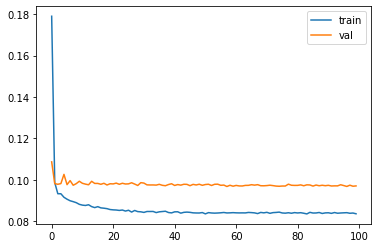

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
yhat=model.predict(xtest)
xtest=xtest.reshape((xtest.shape[0],xtest.shape[2]))

28/28 [==============================] - 1s 3ms/step


In [ ]:
from tensorflow.keras.layers import Concatenate
#concat=Concatenate(axis=1)
inv_yhat=Concatenate(axis=1)([yhat,xtest[:, 1:]])
inv_yhat=scaler.inverse_transform(inv_yhat)
inv_yhat=inv_yhat[:,0]

In [ ]:
ytest=ytest.reshape(len(ytest),1)

inv_y=Concatenate(axis=1)([ytest,xtest[:, 1:]])
inv_y=scaler.inverse_transform(inv_y)
inv_y=inv_y[:,0]

In [ ]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae=mean_absolute_error(inv_y,inv_yhat)
mse=mean_squared_error(inv_y,inv_yhat)
rmse=math.sqrt(mean_squared_error(inv_y,inv_yhat))
print("MAE : %f" ,mae )
print("MSE : %f" ,mse )
print("RMSE : %f" ,rmse )

MAE : %f 9.127622183106382
MSE : %f 166.75112899134356
RMSE : %f 12.913215284790367


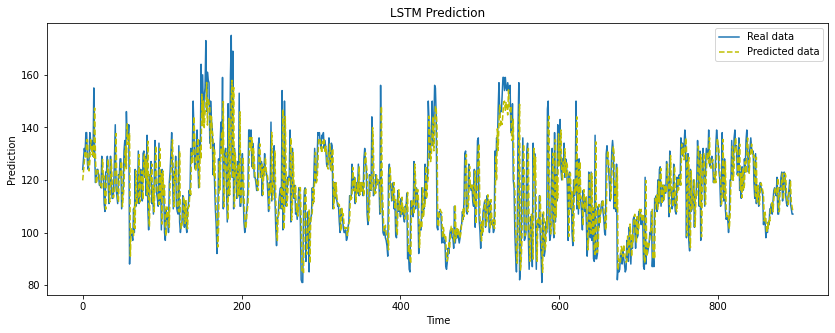

In [ ]:
#plot prediction
plt.figure(figsize=(14,5))
plt.plot(inv_y,label="Real data")
plt.plot(inv_yhat,color='y',label="Predicted data",linestyle = '--')
plt.ylabel('Prediction')
plt.xlabel('Time')
plt.title('LSTM Prediction')
plt.legend()
plt.show()